In [14]:
%matplotlib inline

In [118]:
import os
import tqdm
from PIL import Image
from pathlib import Path
from xml.dom import minidom
import numpy as np

import matplotlib
matplotlib.use( 'tkagg' )
import matplotlib.pyplot as plt

In [2]:
from utils.plots import plot_images

yolo format: xc, yc, w, h in (0, 1)

In [94]:
def get_labels(file_path, classes):
    """
    from (x1, y1, w, h) to (xc, yc, w, h)
    """
    labels = []
    xmldoc = minidom.parse(str(file_path))
    for item in xmldoc.getElementsByTagName('DL_ZONE'):
        cls = item.attributes['gedi_type'].value
        x1  = int(item.attributes['col'].value)
        y1  = int(item.attributes['row'].value)
        w   = int(item.attributes['width'].value)
        h   = int(item.attributes['height'].value)
        xc  = x1+w/2
        yc  = y1+h/2
        labels.append([
            classes[cls],
            xc, yc, w, h
        ])
    
    return labels

In [47]:
classes = {
    'DLSignature': 0,
    'DLLogo': 1
}
classes_names = {classes[k]: k for k in classes}

In [148]:
base_path = Path('/media/dmitriy/main/data/tobacco_800/tobacco_data_zhugy/tobacco_xml')
target_path = Path("/media/dmitriy/main/data/tobacco_800/tobacco_data_zhugy/tobacco_yolov5")

os.makedirs(target_path, exist_ok=True)
os.makedirs(target_path / 'images', exist_ok=True)
os.makedirs(target_path / 'labels', exist_ok=True)

In [ ]:
# convert

for file in tqdm.tqdm(os.listdir(os.path.join(base_path, 'images'))):
    base_file_path = base_path / 'images' / file
    base_labels_path = base_path / 'labels' / file.replace('tif', 'xml')
    target_file_path = target_path / 'images' / file.replace('tif', 'jpg')
    target_labels_path = target_path / 'labels' / file.replace('tif', 'txt')

    img = np.array(Image.open(base_file_path)).astype(float)
    img = img.reshape(1, *img.shape)
    img = np.repeat(img, 3, axis=0)
    Image.fromarray((img*255).astype(np.uint8).transpose(1, 2, 0)).save(target_file_path)
    
    labels = get_labels(base_labels_path, classes)
    labels = np.array(labels)
    if len(labels)> 0:
        labels[:, 1] /= img.shape[2] # xc / w
        labels[:, 2] /= img.shape[1] # yc / h
        labels[:, 3] /= img.shape[2] # bbw / w
        labels[:, 4] /= img.shape[1] # bbh / h

    labels = labels.tolist()
    labels = [[int(row[0])] + row[1:] for row in labels]
    with open(file=target_labels_path, mode='w') as f:
        for row in labels:
            f.write(" ".join(map(str, row))+'\n')

 90%|████████▉ | 1155/1290 [03:13<00:15,  8.95it/s]

In [138]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [144]:
data_path

'/media/dmitriy/main/data/tobacco_800/tobacco_data_zhugy/tobacco_yolov5/data.yaml'

In [142]:
data_path = str(target_path/'data.yaml')
train_path = str(target_path/'images')
valid_path = str(target_path/'images')

In [143]:
%%writetemplate {data_path}

train: {train_path}
val: {valid_path}

nc: 2
names: ['DLSignature', 'DLLogo']

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/home/dmitriy/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/dmitriy/.local/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/dmitriy/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/dmitriy/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f5a4dbb7ee0>
Exception in Tkinter callback
Traceba

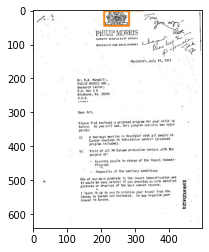

In [128]:
# demo view
img_i = 0
file_path = base_path/'images'/files[img_i]
labels_path = base_path/'labels'/files[img_i].replace('tif', 'xml')

img = np.array(Image.open(file_path)).astype(float)
img = img.reshape(1, *img.shape)
img = np.repeat(img, 3, axis=0)

labels = get_labels(labels_path, classes)
labels = np.array(labels)
col = np.array([[0]]*labels.shape[0])
targets = np.hstack([col, labels])

plot_images(img.reshape(1, *img.shape), targets, names=classes_names)
plt.imshow(Image.open('images.jpg'))
plt.show()

TypeError: Invalid shape (3, 3296, 2560) for image data

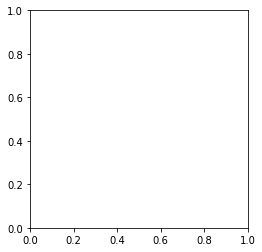

In [42]:
plt.imshow(img)
plt.show()

In [3]:
path = 

In [4]:
!cat {path}

<?xml version="1.0" encoding="UTF-8"?>
<!--GEDI is developed at Language and Media Processing Laboratory, University of Maryland.-->
<GEDI xmlns="http://lamp.cfar.umd.edu/GEDI" version="1.0">
	<DL_DOCUMENT src="ajz31e00.tif" NrOfPages="1" docTag="xml">
		<DL_PAGE gedi_type="DL_PAGE" src="ajz31e00.tif" pageID="1" width="2560" height="3292">
			<DL_ZONE gedi_type="DLSignature" id="None" col="479" row="1450" width="755" height="248" Overlapped="Yes" AuthorID="Vollmuth, T.A."> </DL_ZONE>
			<DL_ZONE gedi_type="DLLogo" id="None" col="127" row="170" width="758" height="236"> </DL_ZONE>
		</DL_PAGE>
	</DL_DOCUMENT>
</GEDI>

DLSignature
DLLogo


In [15]:
dir(itemlist[0])

['ATTRIBUTE_NODE',
 'CDATA_SECTION_NODE',
 'COMMENT_NODE',
 'DOCUMENT_FRAGMENT_NODE',
 'DOCUMENT_NODE',
 'DOCUMENT_TYPE_NODE',
 'ELEMENT_NODE',
 'ENTITY_NODE',
 'ENTITY_REFERENCE_NODE',
 'NOTATION_NODE',
 'PROCESSING_INSTRUCTION_NODE',
 'TEXT_NODE',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_attrsNS',
 '_call_user_data_handler',
 '_child_node_types',
 '_ensure_attributes',
 '_get_attributes',
 '_get_childNodes',
 '_get_firstChild',
 '_get_lastChild',
 '_get_localName',
 '_get_tagName',
 '_localName',
 '_magic_id_nodes',
 'appendChild',
 'attributes',
 'childNodes',
 'cloneNode',
 'firstChild',
 'ge

In [8]:
import xml.etree.ElementTree as ET
root = ET.parse(path).getroot()

In [11]:
root.findall('DL_ZONE')

[]

In [ ]:
for type_tag in root.findall('bar/type'):
    value = type_tag.get('foobar')
    print(value)

In [10]:
dir(ET.parse(path).getroot())

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'attrib',
 'clear',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'insert',
 'items',
 'iter',
 'iterfind',
 'itertext',
 'keys',
 'makeelement',
 'remove',
 'set',
 'tag',
 'tail',
 'text']